In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import urllib
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


In [6]:
# def url_to_image(url):
#     resp = urllib.urlopen(url)
#     img = np.asarray(bytearray(resp.read()), dtype="uint8")
#     img = cv2.imdecode(img, cv2.IMREAD_COLOR)
#     return img

image_url = 'http://datastore01.rediff.com/h1500-w1500/thumb/52645D6963245B6D6B615C2D363730/xn0nbr0g3ghz1uwu.D.0.PAN-Card.jpg'

cap = cv2.VideoCapture(image_url)  # Open the URL as video

success, img = cap.read()  # Read the image as a video frame

if success:
    def display(img,cmap='gray'):
        fig = plt.figure(figsize=(12,10))
        ax = fig.add_subplot(111)
        ax.imshow(img,cmap='gray')
    #img = cv2.imread('panimage.jpg')
    #img = cv2.imread(img1)
    #image = url_to_image(x)
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
    text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
    text2 = pytesseract.image_to_string(threshed, lang="eng+hin")
    print(text2)
    text = text1[text1.conf != -1]
    lines = text.groupby('block_num')['text'].apply(list)
    conf = text.groupby(['block_num'])['conf'].mean()

In [ ]:

def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

आयकर विभाण
INCOME TAX DEPARTMENT
VIVEK KUMAR

BALINDAR SAHA

17/09/1996
EAKPK1204G

fae Se

भारत सरकार

GOVT. OF INDIA

Ter

29082015

~~



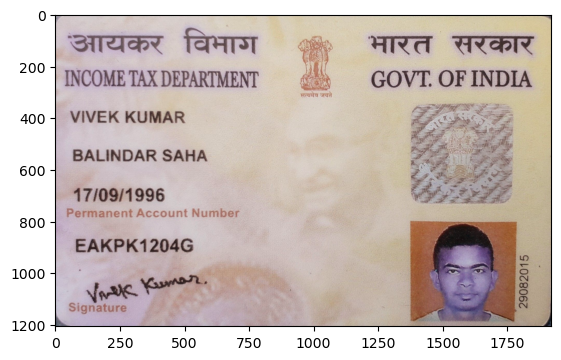

In [8]:
#img = cv2.imread('panimage.jpg')
img = cv2.imread(img1)
image = url_to_image(x)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng+hin")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [15]:
#pd.set_option('max_columns', None)
pd.options.display.max_columns = None

#pd.set_option('display.max_rows', text.shape[0]+1)
pd.options.display.max_rows = text.shape[0]+1

In [16]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       1         1          0        0         0         0     0     0   
1       2         1          1        0         0         0    40    55   
2       3         1          1        1         0         0    40    55   
3       4         1          1        1         1         0    52    55   
4       5         1          1        1         1         1    52    83   
..    ...       ...        ...      ...       ...       ...   ...   ...   
32      5         1          1        1         7         1   118  1008   
33      2         1          2        0         0         0  1362   768   
34      3         1          2        1         0         0  1362   768   
35      4         1          2        1         1         0  1362   768   
36      5         1          2        1         1         1  1362   768   

    width  height       conf   text  
0    1920    1206  -1.000000    NaN  
1    1808    

In [23]:
from pytesseract import Output

img = cv2.imread('panimage.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT, lang="eng+hin")
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


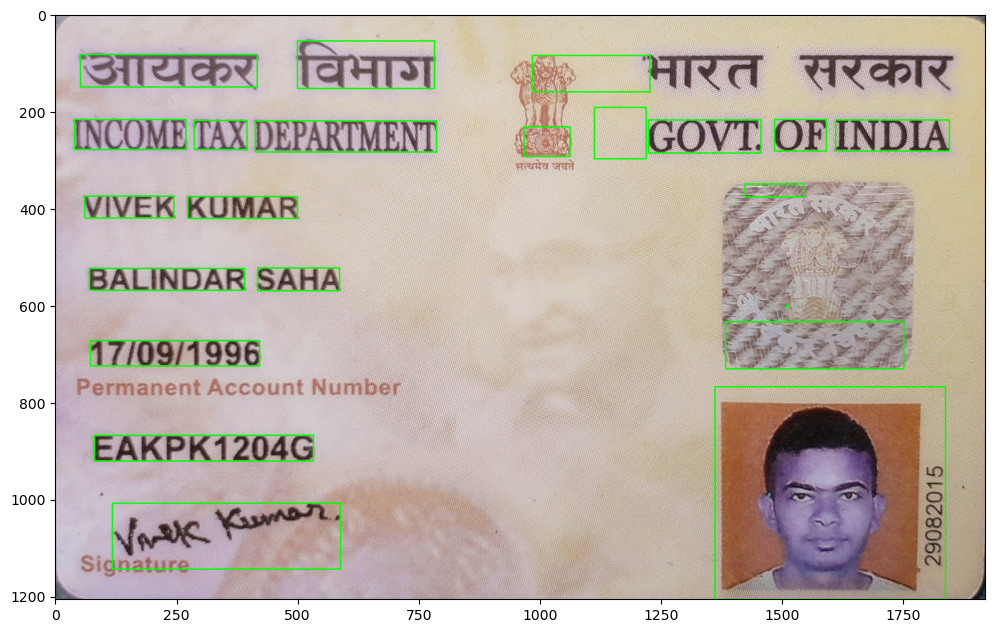

In [25]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 0:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)